In [83]:
import ppscore as pps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster

In [84]:
pd.set_option("display.max_columns", 60)
db= pd.read_csv("houses_Madrid.csv")
db=db.drop(['Unnamed: 0'],axis=1)
db.head()

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,2.0,1.0,1.0,3,135,sale,471.0,85000.0,HouseType 1: Pisos,False,False,1960.0,not_specified,not_specified,True,False,False,True,False,False,False,False,False,False,D,False,False,Villaverde
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,3.0,1.0,1.0,4,132,sale,666.0,129900.0,HouseType 1: Pisos,True,False,not_specified,not_specified,not_specified,False,True,True,True,False,False,True,False,False,False,en trámite,False,False,Villaverde
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,2.0,2.0,1.0,1,134,sale,722.0,144247.0,HouseType 1: Pisos,False,False,not_specified,False,True,False,True,True,True,False,False,False,False,True,False,no indicado,False,False,Villaverde
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,2.0,1.0,1.0,Bajo,134,sale,583.0,109900.0,HouseType 1: Pisos,False,False,1955.0,not_specified,not_specified,False,False,True,True,False,False,False,False,True,False,en trámite,False,False,Villaverde
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2.0,2.0,1.0,4,133,sale,1094.0,260000.0,HouseType 1: Pisos,False,False,2003.0,not_specified,not_specified,True,True,True,True,False,True,False,False,True,True,en trámite,True,True,Villaverde


In [85]:
db.buy_price.max()

8800000.0

In [86]:
db.buy_price.min()

36000.0

In [87]:
db.rent_price.max()

2517.0

In [88]:
db.loc[(db['rent_price'] > 0) ].min()

id                                                               1
title                            Casa o chalet en venta en Aravaca
neighborhood                         12 de Octubre-Orcasur, Madrid
sq_mt_built                                                   13.0
n_rooms                                                        0.0
n_bathrooms                                                    1.0
n_floors                                                       1.0
floor                                                            1
neighborhood_id                                                  1
operation                                                     sale
rent_price                                                    18.0
buy_price                                                  36000.0
house_type_id                                   HouseType 1: Pisos
is_renewal_needed                                            False
is_new_development                                           F

In [89]:
db.corr()

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,neighborhood_id,rent_price,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,has_parking,is_parking_included_in_price
id,1.000000,-0.062912,-0.023928,-0.061556,0.025993,0.743401,0.019973,-0.165313,-0.053710,0.093287,-0.057402,-0.041360,-0.128813,0.016910,0.036103,0.105692,0.095675,-0.095119,0.058034,0.083139,0.078035,0.095143
sq_mt_built,-0.062912,1.000000,0.671742,0.775309,0.494307,-0.058602,-0.208030,0.761596,0.061392,-0.026180,0.140054,0.117756,-0.117644,-0.262116,0.589186,0.318445,0.184664,0.089427,0.283341,-0.011897,0.381966,0.388769
n_rooms,-0.023928,0.671742,1.000000,0.729047,0.389734,-0.028170,-0.158436,0.608810,0.171219,-0.062019,0.037088,0.081757,-0.092713,-0.161120,0.457415,0.196314,0.219805,0.088263,0.211888,-0.008722,0.291107,0.298403
n_bathrooms,-0.061556,0.775309,0.729047,1.000000,0.485215,-0.049812,-0.196624,0.771460,-0.000564,0.014400,0.185065,0.146704,-0.061407,-0.250476,0.584751,0.365709,0.177483,0.084935,0.312124,0.029661,0.427610,0.431629
n_floors,0.025993,0.494307,0.389734,0.485215,1.000000,-0.007579,-0.103270,0.355428,-0.011380,0.018840,0.088456,0.071158,-0.358905,-0.455986,0.741152,0.272950,0.154845,0.067506,0.137920,-0.116534,0.236604,0.255707
neighborhood_id,0.743401,-0.058602,-0.028170,-0.049812,-0.007579,1.000000,0.014927,-0.106938,-0.051833,0.095515,-0.031395,-0.031569,-0.077224,0.031643,-0.002613,0.041873,0.059290,-0.069571,0.044962,0.027298,0.067837,0.070234
rent_price,0.019973,-0.208030,-0.158436,-0.196624,-0.103270,0.014927,1.000000,-0.468549,0.000379,0.012107,-0.022537,-0.007387,0.052485,0.073738,-0.119306,-0.060185,-0.033173,-0.020434,-0.054613,0.025537,-0.061556,-0.064570
buy_price,-0.165313,0.761596,0.608810,0.771460,0.355428,-0.106938,-0.468549,1.000000,0.043886,-0.022674,0.161465,0.107459,-0.005697,-0.183708,0.447620,0.244931,0.120741,0.111111,0.262131,-0.033714,0.330555,0.326400
is_renewal_needed,-0.053710,0.061392,0.171219,-0.000564,-0.011380,-0.051833,0.000379,0.043886,1.000000,-0.127678,-0.233621,-0.117152,-0.007985,0.004165,-0.017613,-0.154662,0.029455,0.008038,-0.065648,-0.095446,-0.087712,-0.090488
is_new_development,0.093287,-0.026180,-0.062019,0.014400,0.018840,0.095515,0.012107,-0.022674,-0.127678,1.000000,-0.214362,-0.222887,0.113826,0.044349,-0.007786,0.250835,0.100785,-0.094934,0.122608,0.026270,0.107024,0.117669


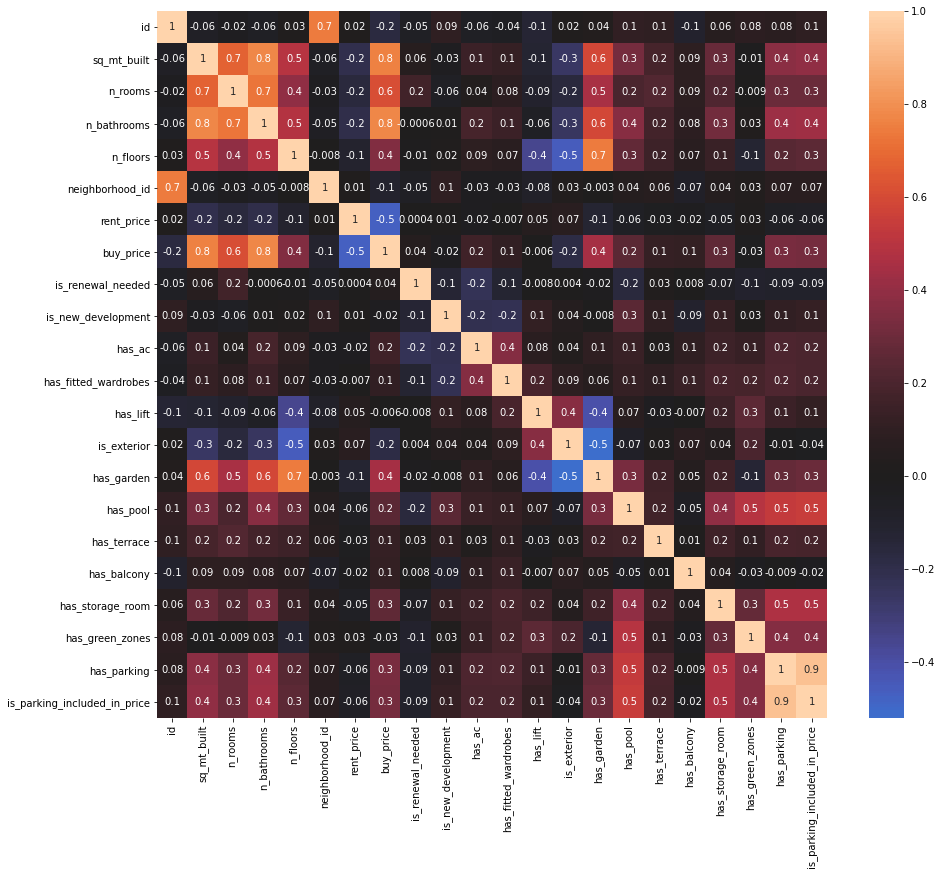

In [90]:
fix,ax=plt.subplots(figsize=(15,13))
corr_matrix = db.corr() 
sns.heatmap(corr_matrix, annot = True, fmt='.1g',center=0); 

In [91]:
RM = np.corrcoef(db["buy_price"], db["sq_mt_built"])
RM

array([[1.        , 0.76159566],
       [0.76159566, 1.        ]])

<AxesSubplot:xlabel='buy_price', ylabel='sq_mt_built'>

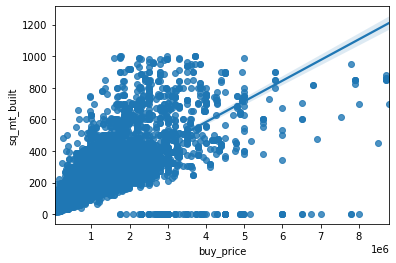

In [92]:
sns.regplot(x='buy_price', y='sq_mt_built', data=db)

<AxesSubplot:xlabel='buy_price', ylabel='n_rooms'>

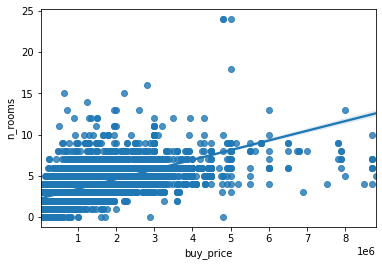

In [93]:
sns.regplot(x='buy_price', y='n_rooms', data=db)

In [94]:
houses_percentage=db.house_type_id.value_counts().apply(lambda x: x/db.shape[0]).sort_values(ascending=False)
houses_percentage

HouseType 1: Pisos            0.814527
HouseType 2: Casa o chalet    0.089149
HouseType 5: Áticos           0.047472
HouseType 4: Dúplex           0.031096
HouseType 3: Estudios         0.017756
Name: house_type_id, dtype: float64

<AxesSubplot:ylabel='house_type_id'>

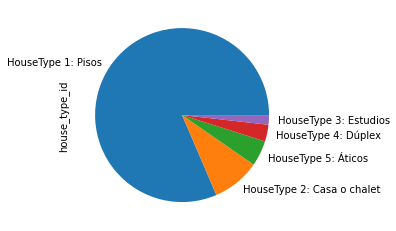

In [95]:
houses_percentage.plot(kind='pie',normalize=False)

In [96]:
db.loc[db.house_type_id=='HouseType 3: Estudios'].buy_price.min()

52990.0

In [97]:
db.loc[db.house_type_id=='HouseType 2: Casa o chalet'].buy_price.min()

39000.0

In [98]:
db[db.house_type_id=='HouseType 5: Áticos'].buy_price.min()

90000.0

In [99]:
db.loc[db.house_type_id=='HouseType 1: Pisos'].buy_price.min()

36000.0

In [100]:
bedrooms_percentage=db.n_rooms.value_counts().apply(lambda x: x/db.shape[0]).sort_values(ascending=False)
bedrooms_percentage


3.0     0.331800
2.0     0.252956
4.0     0.154883
1.0     0.104283
5.0     0.080730
6.0     0.032890
0.0     0.020194
7.0     0.011914
8.0     0.005152
9.0     0.002484
10.0    0.001196
11.0    0.000460
12.0    0.000414
13.0    0.000276
24.0    0.000138
15.0    0.000092
14.0    0.000046
18.0    0.000046
16.0    0.000046
Name: n_rooms, dtype: float64

In [101]:
bedrooms_percentage.cumsum()

3.0     0.331800
2.0     0.584756
4.0     0.739638
1.0     0.843921
5.0     0.924652
6.0     0.957542
0.0     0.977736
7.0     0.989650
8.0     0.994802
9.0     0.997286
10.0    0.998482
11.0    0.998942
12.0    0.999356
13.0    0.999632
24.0    0.999770
15.0    0.999862
14.0    0.999908
18.0    0.999954
16.0    1.000000
Name: n_rooms, dtype: float64

In [102]:
def pct80(column):
    return column.quantile(0.8)

db['n_rooms'].agg(pct80)


4.0

In [103]:
db.n_bathrooms.value_counts()

1.0     9099
2.0     7408
3.0     2427
4.0     1170
5.0      871
6.0      422
7.0      182
8.0       94
9.0       37
10.0      13
11.0       7
14.0       3
13.0       3
15.0       1
12.0       1
16.0       1
Name: n_bathrooms, dtype: int64

In [104]:
bathrooms_percentage=db.n_bathrooms.value_counts().apply(lambda x: x/db.shape[0]).sort_values(ascending=False)
bathrooms_percentage.cumsum()


1.0     0.418557
2.0     0.759327
3.0     0.870969
4.0     0.924790
5.0     0.964856
6.0     0.984268
7.0     0.992640
8.0     0.996964
9.0     0.998666
10.0    0.999264
11.0    0.999586
14.0    0.999724
13.0    0.999862
15.0    0.999908
12.0    0.999954
16.0    1.000000
Name: n_bathrooms, dtype: float64

In [105]:
db['n_bathrooms'].agg(pct80)

3.0

In [106]:
db.is_renewal_needed.value_counts()

False    17747
True      3992
Name: is_renewal_needed, dtype: int64

In [107]:
(len(db['is_renewal_needed']))
(db.is_renewal_needed==False).sum()

Renewal_needed_ratio=(100*(db.is_renewal_needed==False).sum()/(len(db['is_renewal_needed'])))
Renewal_needed_ratio

print("The ratio of houses that don´t need a renewal is: \n",round(Renewal_needed_ratio,2), "%")


The ratio of houses that don´t need a renewal is: 
 81.64 %


In [108]:
db.is_new_development.value_counts()

False    20270
True      1469
Name: is_new_development, dtype: int64

In [109]:
(len(db['is_new_development']))
(db.is_new_development==True).sum()

New_development_houses=(100*(db.is_new_development==True).sum()/(len(db['is_new_development'])))
New_development_houses

print("The ratio of houses that are a new development is: \n",round(New_development_houses,2), "%")

The ratio of houses that are a new development is: 
 6.76 %


In [110]:
db.has_pool.value_counts()

False    16570
True      5169
Name: has_pool, dtype: int64

In [111]:
(len(db['has_pool']))
(db.has_pool==True).sum()

Houses_with_pool=(100*(db.has_pool==True).sum()/(len(db['has_pool'])))
Houses_with_pool

print("The ratio of houses that have pool is: \n",round(Houses_with_pool,2), "%")

The ratio of houses that have pool is: 
 23.78 %


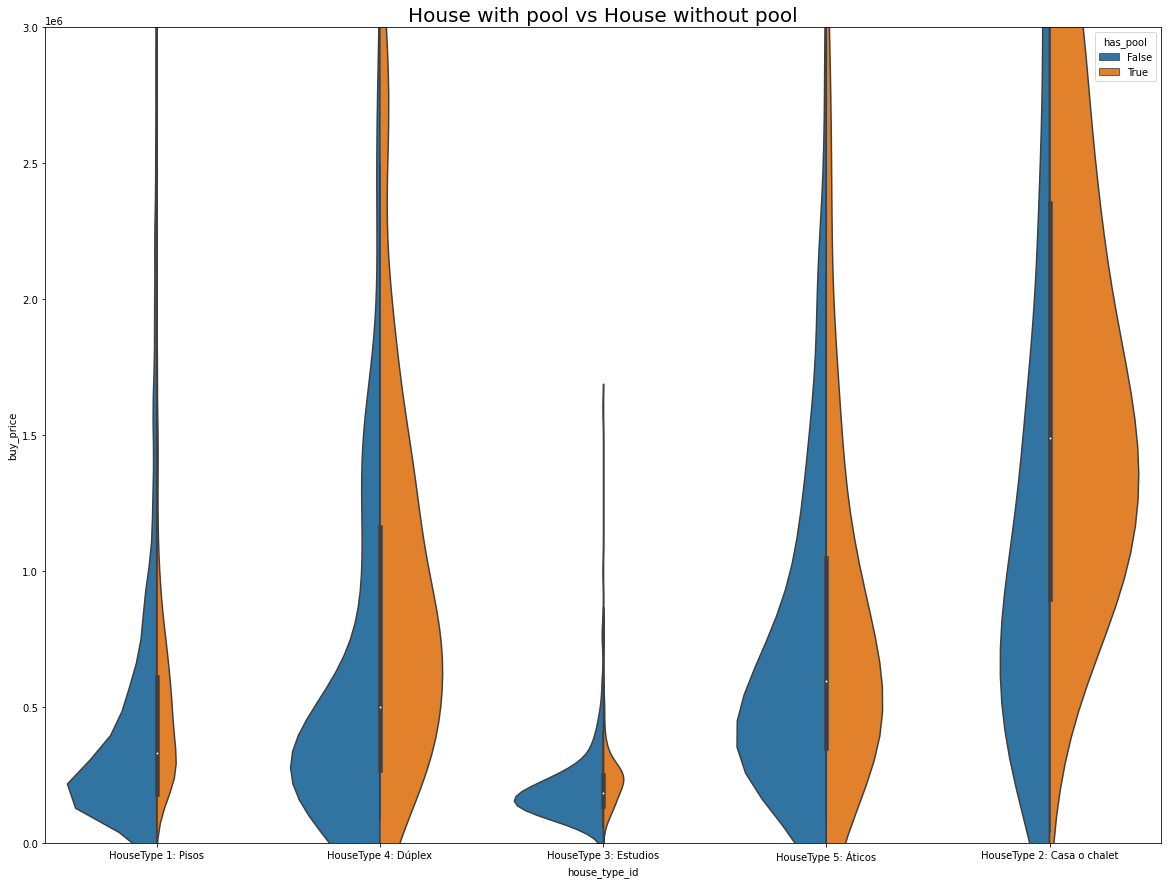

In [112]:
f, ax = plt.subplots(figsize=(20, 15))

sns.violinplot(x='house_type_id', y='buy_price', hue='has_pool', data=db, split=True, scale='count')
ax.set_ylim(0,3000000)
plt.title("House with pool vs House without pool", size=20)
plt.show()

In [113]:
db.has_lift.value_counts()

True     14895
False     6844
Name: has_lift, dtype: int64

In [114]:
(len(db['has_lift']))
(db.has_lift==True).sum()

Houses_with_lift=(100*(db.has_lift==True).sum()/(len(db['has_lift'])))
Houses_with_lift

print("The ratio of houses that have lift is: \n",round(Houses_with_lift,2), "%")

The ratio of houses that have lift is: 
 68.52 %


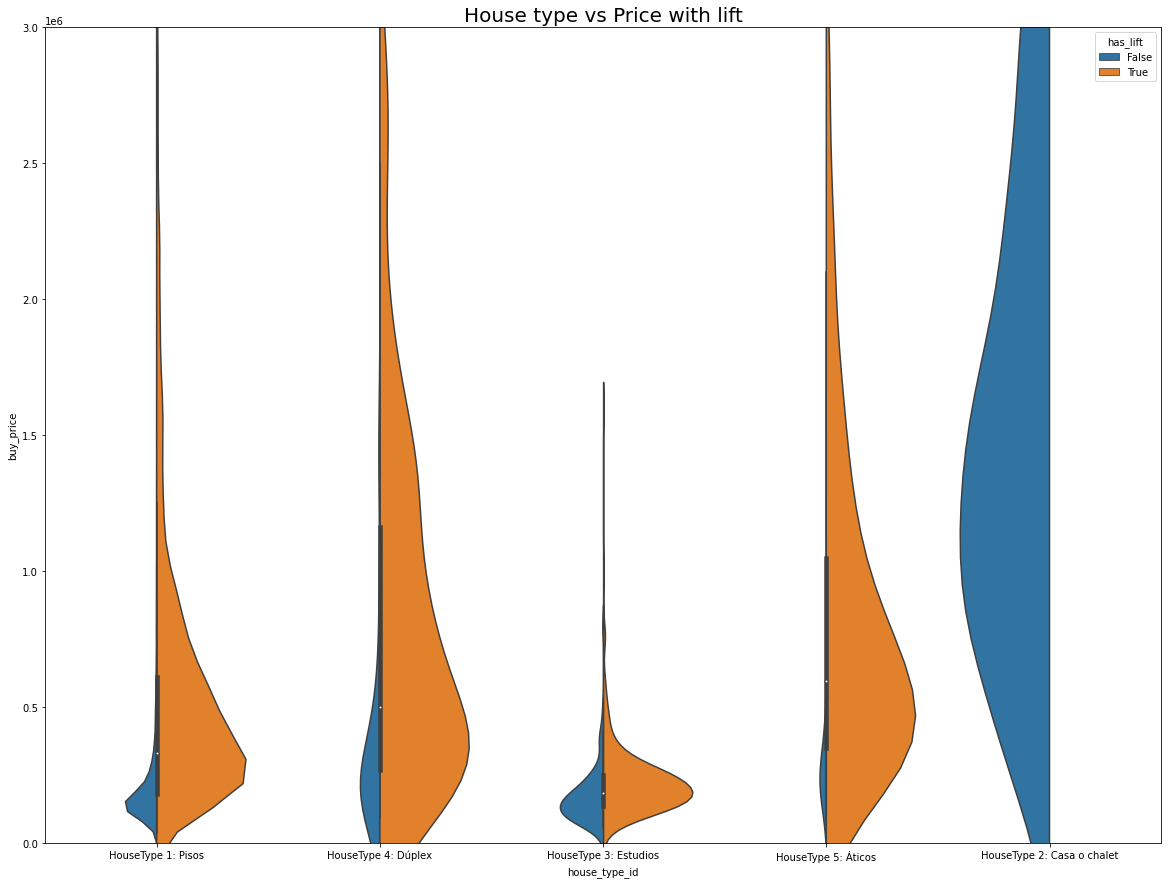

In [115]:
f, ax = plt.subplots(figsize=(20, 15))

sns.violinplot(x='house_type_id', y='buy_price', hue='has_lift', data=db, split=True, scale='count')
ax.set_ylim(0,3000000)
plt.title("House type vs Price with lift", size=20)
plt.show()

In [116]:
db.is_exterior.value_counts()

True     16922
False     4817
Name: is_exterior, dtype: int64

In [117]:
(len(db['is_exterior']))
(db.is_exterior==True).sum()

Houses_exterior=(100*(db.is_exterior==True).sum()/(len(db['is_exterior'])))
Houses_exterior

print("The ratio of houses that are exterior is: \n",round(Houses_exterior,2), "%")

The ratio of houses that are exterior is: 
 77.84 %


In [120]:
db.has_terrace.value_counts()

False    12193
True      9546
Name: has_terrace, dtype: int64

In [121]:
db.has_balcony.value_counts()

False    18419
True      3320
Name: has_balcony, dtype: int64

In [122]:
db[(db.has_terrace)|(db.has_balcony)]

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,3.0,1.0,1.0,4,132,sale,666.0,129900.0,HouseType 1: Pisos,True,False,not_specified,not_specified,not_specified,False,True,True,True,False,False,True,False,False,False,en trámite,False,False,Villaverde
5,21737,Piso en venta en geologia,"San Andrés, Madrid",126.0,4.0,2.0,1.0,3,134,sale,901.0,195000.0,HouseType 1: Pisos,False,False,1981.0,False,True,False,False,False,True,False,False,True,True,False,False,en trámite,True,True,Villaverde
6,21736,Piso en venta en avenida Real de Pinto,"San Andrés, Madrid",120.0,5.0,2.0,1.0,1,134,sale,884.0,190000.0,HouseType 1: Pisos,False,False,not_specified,False,True,True,True,False,True,False,True,True,True,True,True,F,True,True,Villaverde
7,21735,Piso en venta en San Andrés,"Villaverde, Madrid",125.0,3.0,2.0,1.0,2,134,sale,912.0,198500.0,HouseType 1: Pisos,False,False,not_specified,not_specified,not_specified,True,True,False,True,False,False,True,False,False,False,no indicado,False,False,Villaverde
9,21733,Piso en venta en calle de Martinez Oviol,"Los Rosales, Madrid",85.0,2.0,1.0,1.0,7,133,sale,672.0,131400.0,HouseType 1: Pisos,True,False,1950.0,False,True,False,False,False,True,False,False,True,False,False,False,en trámite,False,False,Villaverde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21730,9,Casa o chalet independiente en venta en aveni...,"Campo de las Naciones-Corralejos, Madrid",267.0,5.0,3.0,2.0,not_specified,9,sale,2315.0,790000.0,HouseType 2: Casa o chalet,False,False,2020.0,not_specified,not_specified,True,True,False,False,True,True,True,False,True,False,en trámite,True,True,Barajas
21731,8,Piso en venta en calle Galeón,"Alameda de Osuna, Madrid",89.0,3.0,1.0,1.0,5,8,sale,1135.0,275000.0,HouseType 1: Pisos,False,False,not_specified,True,False,False,True,True,True,False,False,True,False,False,True,no indicado,False,False,Barajas
21736,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,4.0,2.0,1.0,Bajo,9,sale,2081.0,680000.0,HouseType 1: Pisos,False,False,2002.0,False,True,True,True,False,True,False,True,True,False,True,False,E,True,True,Barajas
21737,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,4.0,3.0,3.0,not_specified,9,sale,2115.0,695000.0,HouseType 2: Casa o chalet,False,False,1981.0,not_specified,not_specified,True,True,False,False,True,False,True,True,True,False,en trámite,True,True,Barajas


In [123]:
db.has_storage_room.value_counts()

False    14043
True      7696
Name: has_storage_room, dtype: int64

In [124]:
(len(db['has_storage_room']))
(db.has_storage_room==True).sum()

Houses_with_storage_room=(100*(db.has_storage_room==True).sum()/(len(db['has_storage_room'])))
Houses_with_storage_room

print("The ratio of houses that have storage room is: \n",round(Houses_with_storage_room,2), "%")

The ratio of houses that have storage room is: 
 35.4 %


In [125]:
db.has_parking.value_counts()

False    14021
True      7718
Name: has_parking, dtype: int64

In [126]:
(len(db['has_parking']))
(db.has_parking==True).sum()

Houses_with_parking=(100*(db.has_parking==True).sum()/(len(db['has_parking'])))
Houses_with_parking

print("The ratio of houses that have parking is: \n",round(Houses_with_parking,2), "%")

The ratio of houses that have parking is: 
 35.5 %


In [127]:
db.loc[(db.built_year <'1960')].buy_price.mean()

695597.3712462463

In [128]:
db.loc[(db.built_year >'1960') & (db.built_year < '1980')].buy_price.mean()

567243.7303556658

In [129]:
db.loc[(db.built_year >'1980') & (db.built_year < '2000')].buy_price.mean()

731858.7676950998

In [130]:
db.loc[db.built_year >'2000' ].buy_price.mean()

658774.4471185212

In [131]:
db.buy_price.median()

375000.0

In [132]:
db.buy_price.mean()

653572.8620451723

In [133]:
np.round(trim_mean(db.buy_price, 0.05), 300)

540478.4372668267

In [134]:
db.buy_price.mode()

0    550000.0
dtype: float64

In [135]:
def preciometrocuadrado(x):
    
    x['price_sqm']=x['buy_price']/(x['sq_mt_built'])
    
    return x

In [136]:
db = db.apply(preciometrocuadrado,axis=1)

### Reducimos el dataset buscando que la media y la mediana no estén tan alejadas


In [137]:
db_intermedio=db[(db.buy_price > 60000) & (db.buy_price < 1000000)]

In [138]:
db_intermedio.median()

id                               11343.500000
sq_mt_built                         89.000000
n_rooms                              3.000000
n_bathrooms                          1.000000
n_floors                             1.000000
neighborhood_id                     60.000000
rent_price                        1197.000000
buy_price                       299000.000000
is_renewal_needed                    0.000000
is_new_development                   0.000000
has_ac                               0.000000
has_fitted_wardrobes                 1.000000
has_lift                             1.000000
is_exterior                          1.000000
has_garden                           0.000000
has_pool                             0.000000
has_terrace                          0.000000
has_balcony                          0.000000
has_storage_room                     0.000000
has_green_zones                      0.000000
has_parking                          0.000000
is_parking_included_in_price      

In [139]:
db_intermedio.mean()

id                               11224.444777
sq_mt_built                        103.497618
n_rooms                              2.643680
n_bathrooms                          1.646283
n_floors                             1.049629
neighborhood_id                     64.130941
rent_price                        1323.679129
buy_price                       375364.407611
is_renewal_needed                    0.175307
is_new_development                   0.071618
has_ac                               0.483383
has_fitted_wardrobes                 0.600199
has_lift                             0.698682
is_exterior                          0.811842
has_garden                           0.021159
has_pool                             0.198959
has_terrace                          0.413537
has_balcony                          0.140191
has_storage_room                     0.303257
has_green_zones                      0.197685
has_parking                          0.291237
is_parking_included_in_price      

In [140]:
db_intermedio.head()

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district,price_sqm
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,2.0,1.0,1.0,3,135,sale,471.0,85000.0,HouseType 1: Pisos,False,False,1960.0,not_specified,not_specified,True,False,False,True,False,False,False,False,False,False,D,False,False,Villaverde,1328.125000
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,3.0,1.0,1.0,4,132,sale,666.0,129900.0,HouseType 1: Pisos,True,False,not_specified,not_specified,not_specified,False,True,True,True,False,False,True,False,False,False,en trámite,False,False,Villaverde,1855.714286
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,2.0,2.0,1.0,1,134,sale,722.0,144247.0,HouseType 1: Pisos,False,False,not_specified,False,True,False,True,True,True,False,False,False,False,True,False,no indicado,False,False,Villaverde,1534.542553
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,2.0,1.0,1.0,Bajo,134,sale,583.0,109900.0,HouseType 1: Pisos,False,False,1955.0,not_specified,not_specified,False,False,True,True,False,False,False,False,True,False,en trámite,False,False,Villaverde,1717.187500
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2.0,2.0,1.0,4,133,sale,1094.0,260000.0,HouseType 1: Pisos,False,False,2003.0,not_specified,not_specified,True,True,True,True,False,True,False,False,True,True,en trámite,True,True,Villaverde,2407.407407


In [141]:
db_intermedio.buy_price.min()

61000.0

In [142]:
db_intermedio.buy_price.max()

999999.0

In [143]:
db_intermedio.price_sqm.max()

18461.53846153846

In [144]:
db_intermedio.price_sqm.min()

447.36842105263156

In [145]:
db_intermedio.rent_price.min()

353.0

In [146]:
db_intermedio.rent_price.max()

2517.0

In [177]:
pd.set_option("display.max_rows", 10)
db_intermedio[(db_intermedio.price_sqm < 1500) & (db_intermedio.has_pool ==True)]

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district,price_sqm,year_profit
803,20939,"Chalet adosado en venta en calle Tres Cantos, 1","El Cañaveral - Los Berrocales, Madrid",285.0,4.0,3.0,4.0,not_specified,126,sale,1298.0,339841.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,False,True,True,False,False,False,no indicado,False,False,Vicalvaro,1192.424561,4.583320
804,20938,"Chalet adosado en venta en calle Tres Cantos, 1","El Cañaveral - Los Berrocales, Madrid",268.0,4.0,3.0,4.0,not_specified,126,sale,1294.0,338066.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,False,True,True,False,False,False,no indicado,False,False,Vicalvaro,1261.440299,4.593186
805,20937,"Chalet adosado en venta en calle Tres Cantos, 1","El Cañaveral - Los Berrocales, Madrid",268.0,4.0,3.0,4.0,not_specified,126,sale,1293.0,337631.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,False,True,True,False,False,False,no indicado,False,False,Vicalvaro,1259.817164,4.595550
880,20862,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1318.0,348000.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1403.225806,4.544828
923,20819,"Chalet adosado en venta en calle Tres Cantos, 1","El Cañaveral - Los Berrocales, Madrid",265.0,4.0,3.0,4.0,not_specified,126,sale,1301.0,340870.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,False,True,True,False,False,False,no indicado,False,False,Vicalvaro,1286.301887,4.580045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,20609,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1332.0,354000.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1427.419355,4.515254
1551,20191,Chalet adosado en venta en Ensanche de Vallec...,"Villa de Vallecas, Madrid",352.0,5.0,3.0,3.0,not_specified,129,sale,1710.0,519000.0,HouseType 2: Casa o chalet,False,False,not_specified,False,True,True,True,False,False,True,True,True,True,True,False,en trámite,True,True,Villa de Vallecas,1474.431818,3.953757
2293,19449,Piso en venta en calle Rutilo,"San Fermín, Madrid",85.0,2.0,1.0,1.0,5,121,sale,569.0,106700.0,HouseType 1: Pisos,False,False,2000.0,True,False,True,True,True,True,False,True,False,False,True,True,en trámite,True,True,Usera,1255.294118,6.399250
7549,14193,Casa o chalet independiente en venta en Urb. ...,"Moncloa, Madrid",750.0,6.0,3.0,2.0,not_specified,76,sale,2514.0,950000.0,HouseType 2: Casa o chalet,True,False,not_specified,False,True,False,False,False,False,True,True,False,False,False,False,no indicado,False,False,Moncloa-Aravaca,1266.666667,3.175579


In [148]:
db_intermedio[(db_intermedio.price_sqm < 1500) & (db_intermedio.has_pool ==True) & (db_intermedio.has_garden ==True)]

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district,price_sqm
880,20862,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1318.0,348000.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1403.225806
1122,20620,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1318.0,348000.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1403.225806
1126,20616,"Chalet adosado en venta en calle Igualdad, 71","El Cañaveral - Los Berrocales, Madrid",306.0,4.0,3.0,4.0,not_specified,126,sale,1478.0,417000.0,HouseType 2: Casa o chalet,False,False,not_specified,not_specified,not_specified,False,True,False,False,True,True,True,False,False,False,en trámite,True,True,Vicalvaro,1362.745098
1131,20611,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1332.0,354100.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1427.822581
1132,20610,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1330.0,353000.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1423.387097
1133,20609,Chalet adosado en venta en calle Ferenc Puska...,"El Cañaveral - Los Berrocales, Madrid",248.0,4.0,3.0,3.0,not_specified,126,sale,1332.0,354000.0,HouseType 2: Casa o chalet,False,True,not_specified,not_specified,not_specified,False,False,False,False,True,True,True,False,False,False,no indicado,True,True,Vicalvaro,1427.419355
1551,20191,Chalet adosado en venta en Ensanche de Vallec...,"Villa de Vallecas, Madrid",352.0,5.0,3.0,3.0,not_specified,129,sale,1710.0,519000.0,HouseType 2: Casa o chalet,False,False,not_specified,False,True,True,True,False,False,True,True,True,True,True,False,en trámite,True,True,Villa de Vallecas,1474.431818
7549,14193,Casa o chalet independiente en venta en Urb. ...,"Moncloa, Madrid",750.0,6.0,3.0,2.0,not_specified,76,sale,2514.0,950000.0,HouseType 2: Casa o chalet,True,False,not_specified,False,True,False,False,False,False,True,True,False,False,False,False,no indicado,False,False,Moncloa-Aravaca,1266.666667
10130,11609,Casa o chalet independiente en venta en calle...,"Valdebebas - Valdefuentes, Madrid",600.0,6.0,3.0,3.0,not_specified,63,sale,2416.0,849000.0,HouseType 2: Casa o chalet,False,False,not_specified,False,True,False,True,False,False,True,True,True,True,True,False,en trámite,True,True,Hortaleza,1415.000000


In [149]:
db_intermedio.rent_price.min()

353.0

In [150]:
db_intermedio.rent_price.max()

2517.0

In [151]:
def profitability(x):
    
    x['year_profit']=((x['rent_price']*12)/(x['buy_price'])*100)
    
    return x

In [152]:
db = db.apply(profitability,axis=1)

In [153]:
db.year_profit.max()

7.2666666666666675

In [154]:
db_intermedio=db[(db.buy_price > 60000) & (db.buy_price < 1000000)]

In [155]:
db_intermedio.year_profit.max() 

6.944262295081967

In [178]:
pd.set_option("display.max_row", 10)
db[db["year_profit"] > 7]

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district,price_sqm,year_profit
1821,19921,"Estudio en venta en calle de Puentelarra, 7","Santa Eugenia, Madrid",40.0,0.0,1.0,1.0,Bajo,130,sale,316.0,54000.0,HouseType 3: Estudios,False,False,not_specified,False,True,True,False,False,True,False,False,False,False,False,True,no indicado,False,False,Villa de Vallecas,1350.000000,7.022222
2430,19312,Piso en venta en Zofío,"Usera, Madrid",51.0,2.0,1.0,1.0,1,122,sale,218.0,36000.0,HouseType 1: Pisos,False,False,1965.0,False,True,True,True,False,True,False,False,False,False,False,False,no indicado,False,False,Usera,705.882353,7.266667
3248,18494,Estudio en venta en calle Juan Pantoja,"Bellas Vistas, Madrid",18.0,0.0,1.0,1.0,Bajo,111,sale,327.0,56000.0,HouseType 3: Estudios,False,False,not_specified,not_specified,not_specified,False,False,True,False,False,False,False,False,False,False,en trámite,False,False,Tetuan,3111.111111,7.007143
4908,16834,Piso en venta en calle del Puerto de Arlabán,"San Diego, Madrid",31.0,1.0,1.0,1.0,5,89,sale,311.0,53000.0,HouseType 1: Pisos,False,False,1965.0,True,False,False,False,False,True,False,False,False,False,False,False,G,False,False,Puente de Vallecas,1709.677419,7.041509
4984,16758,Chalet adosado en venta en calle de Rodríguez...,"Palomeras Bajas, Madrid",30.0,2.0,1.0,1.0,not_specified,86,sale,235.0,39000.0,HouseType 2: Casa o chalet,True,False,not_specified,not_specified,not_specified,False,False,False,False,False,False,False,False,False,False,en trámite,False,False,Puente de Vallecas,1300.000000,7.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,16429,Piso en venta en calle Emilio Raboso,"San Diego, Madrid",48.0,2.0,1.0,1.0,Bajo,89,sale,305.0,52000.0,HouseType 1: Pisos,False,False,1950.0,not_specified,not_specified,False,False,False,False,False,False,False,False,False,False,en trámite,False,False,Puente de Vallecas,1083.333333,7.038462
13654,8085,Piso en venta en Ventas,"Ciudad Lineal, Madrid",60.0,3.0,1.0,1.0,4,42,sale,321.0,55000.0,HouseType 1: Pisos,True,False,1960.0,False,True,False,False,True,True,False,False,False,False,False,False,no indicado,False,False,Ciudad Lineal,916.666667,7.003636
16671,5068,"Piso en venta en calle Blasón, 3","Puerta Bonita, Madrid",35.0,1.0,1.0,1.0,Bajo,17,sale,251.0,42000.0,HouseType 1: Pisos,True,False,not_specified,False,True,False,False,False,True,False,False,False,False,False,False,no indicado,False,False,Carabanchel,1200.000000,7.171429
16752,4987,"Piso en venta en poeta rioja, 2","Abrantes, Madrid",52.0,2.0,1.0,1.0,Bajo,12,sale,321.0,55000.0,HouseType 1: Pisos,True,False,1958.0,not_specified,not_specified,False,False,False,True,False,False,False,False,False,False,no indicado,False,False,Carabanchel,1057.692308,7.003636


In [180]:
pd.set_option("display.max_rows", 10)
db_intermedio[(db_intermedio.year_profit >6.5) & (db_intermedio.is_renewal_needed ==False) & (db_intermedio.buy_price < 80000)]

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district,price_sqm,year_profit
14,21728,Piso en venta en calle GODELLA,"San Cristóbal, Madrid",64.0,3.0,1.0,1.0,3,135,sale,408.0,72000.0,HouseType 1: Pisos,False,False,1960.0,False,True,False,False,False,True,False,False,True,False,False,False,F,False,False,Villaverde,1125.000000,6.800000
179,21563,Piso en venta en San Cristóbal,"Villaverde, Madrid",60.0,2.0,1.0,1.0,Bajo,135,sale,446.0,79900.0,HouseType 1: Pisos,False,False,not_specified,not_specified,not_specified,False,False,False,True,False,False,False,False,False,False,en trámite,False,False,Villaverde,1331.666667,6.698373
180,21562,Piso en venta en San Andrés,"Villaverde, Madrid",60.0,2.0,1.0,1.0,2,134,sale,446.0,79900.0,HouseType 1: Pisos,False,False,not_specified,not_specified,not_specified,False,False,False,True,False,False,True,False,False,False,en trámite,False,False,Villaverde,1331.666667,6.698373
206,21536,Piso en venta en Rocafort,"San Cristóbal, Madrid",60.0,2.0,1.0,1.0,5,135,sale,413.0,73000.0,HouseType 1: Pisos,False,False,1960.0,False,True,True,False,True,True,False,False,False,False,False,False,en trámite,False,False,Villaverde,1216.666667,6.789041
234,21508,Piso en venta en Los Ángeles,"Villaverde, Madrid",63.0,3.0,1.0,1.0,4,132,sale,446.0,79900.0,HouseType 1: Pisos,False,False,not_specified,not_specified,not_specified,False,False,False,True,False,False,True,False,False,False,en trámite,False,False,Villaverde,1268.253968,6.698373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16973,4766,Piso en venta en Vista Alegre,"Carabanchel, Madrid",79.0,2.0,1.0,1.0,1,18,sale,398.0,70000.0,HouseType 1: Pisos,False,False,1981.0,not_specified,not_specified,True,True,True,True,False,False,False,False,False,False,no indicado,False,False,Carabanchel,886.075949,6.822857
17209,4530,Piso en venta en calle del Aguacate,"Buena Vista, Madrid",65.0,2.0,1.0,1.0,4,13,sale,422.0,74900.0,HouseType 1: Pisos,False,False,not_specified,not_specified,not_specified,False,False,False,False,False,False,False,False,False,False,G,False,False,Carabanchel,1152.307692,6.761015
20850,889,Estudio en venta en Palos de Moguer,"Arganzuela, Madrid",40.0,0.0,1.0,1.0,1,6,sale,393.0,69000.0,HouseType 3: Estudios,False,False,1920.0,False,True,True,False,True,False,False,False,False,False,False,False,no indicado,False,False,Arganzuela,1725.000000,6.834783
20960,779,Estudio en venta en calle CANARIAS,"Palos de Moguer, Madrid",26.0,0.0,1.0,1.0,Semi-sótano interior,6,sale,418.0,74000.0,HouseType 3: Estudios,False,False,1933.0,not_specified,not_specified,False,False,True,False,False,False,False,False,False,False,F,False,False,Arganzuela,2846.153846,6.778378


In [161]:
db_intermedio[(db_intermedio['district']=='Salamanca') & (db_intermedio.is_renewal_needed ==False) & (db_intermedio.year_profit >6)]

,id,title,neighborhood,sq_mt_built,n_rooms,n_bathrooms,n_floors,floor,neighborhood_id,operation,rent_price,buy_price,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,district,price_sqm,year_profit
19891,1848,Estudio en venta en calle Francisco Santos,"Guindalera, Madrid",36.0,0.0,1.0,1.0,4,100,sale,539.0,100000.0,HouseType 3: Estudios,False,False,not_specified,False,True,True,False,False,True,False,False,False,False,True,False,en trámite,False,False,Salamanca,2777.777778,6.468


In [162]:
db.groupby("neighborhood")["rent_price"].median()

neighborhood
12 de Octubre-Orcasur, Madrid                 851.0
Abrantes, Madrid                              744.0
Acacias, Madrid                              1376.0
Adelfas, Madrid                              1428.0
Alameda de Osuna, Madrid                     1581.5
Almagro, Madrid                               882.5
Almendrales, Madrid                           743.0
Aluche, Madrid                                864.5
Ambroz, Madrid                                666.0
Apóstol Santiago, Madrid                     1173.0
Arapiles, Madrid                             1621.0
Aravaca, Madrid                              1689.0
Arganzuela, Madrid                           1393.0
Argüelles, Madrid                            1610.0
Arroyo del Fresno, Madrid                    1918.5
Atalaya, Madrid                              2012.0
Barajas, Madrid                              1885.0
Barrio de Salamanca, Madrid                  1200.0
Bellas Vistas, Madrid                        1009.0

In [163]:
db.groupby("neighborhood")["buy_price"].median().sort_values()

neighborhood
San Cristóbal, Madrid                         97250.0
San Diego, Madrid                            125110.0
Entrevías, Madrid                            127500.0
Villaverde, Madrid                           128000.0
Ambroz, Madrid                               130000.0
Puente de Vallecas, Madrid                   138000.0
Portazgo, Madrid                             139000.0
Numancia, Madrid                             140000.0
Palomeras Bajas, Madrid                      140000.0
Casco Histórico de Vallecas, Madrid          140000.0
Los Rosales, Madrid                          142450.0
San Andrés, Madrid                           145000.0
Zofío, Madrid                                145500.0
Puerta Bonita, Madrid                        146250.0
Águilas, Madrid                              149000.0
Almendrales, Madrid                          149900.0
Los Ángeles, Madrid                          150000.0
Carabanchel, Madrid                          150000.0
Abrantes, Madri

In [164]:
round(db.groupby("district")["buy_price"].mean(),3)

district
Arganzuela             375621.788
Barajas                491864.706
Carabanchel            194044.840
Centro                 678388.748
Chamartin             1215707.676
Chamberi               937917.900
Ciudad Lineal          392969.953
Fuencarral-Pardo       714792.329
Hortaleza              998816.398
Latina                 205255.000
Moncloa-Aravaca       1218557.367
Moratalaz              243137.028
Puente de Vallecas     154253.833
Retiro                 784177.667
Salamanca             1218261.613
Tetuan                 424059.065
Usera                  192131.297
Vicalvaro              255473.537
Villa de Vallecas      218559.401
Villaverde             167402.317
Name: buy_price, dtype: float64

In [165]:
db.groupby("district")["buy_price"].median()

district
Arganzuela            360000.0
Barajas               427500.0
Carabanchel           165000.0
Centro                520000.0
Chamartin             820000.0
Chamberi              710000.0
Ciudad Lineal         259000.0
Fuencarral-Pardo      549000.0
Hortaleza             629000.0
Latina                175000.0
Moncloa-Aravaca       929500.0
Moratalaz             215000.0
Puente de Vallecas    136750.0
Retiro                550000.0
Salamanca             797000.0
Tetuan                299000.0
Usera                 160000.0
Vicalvaro             253896.5
Villa de Vallecas     196000.0
Villaverde            146000.0
Name: buy_price, dtype: float64

In [166]:
db_precio_distrito=db.groupby("district")["buy_price"].median()

In [167]:
db_precio_distrito=pd.DataFrame(db_precio_distrito)

In [168]:
db_precio_distrito=db_precio_distrito.reset_index()

In [169]:
db_precio_distrito

,district,buy_price
0,Arganzuela,360000.0
1,Barajas,427500.0
2,Carabanchel,165000.0
3,Centro,520000.0
4,Chamartin,820000.0
5,Chamberi,710000.0
6,Ciudad Lineal,259000.0
7,Fuencarral-Pardo,549000.0
8,Hortaleza,629000.0
9,Latina,175000.0


In [170]:
db_alquiler_distrito=db.groupby("district")["rent_price"].median()

In [171]:
db_alquiler_distrito=pd.DataFrame(db_alquiler_distrito)

In [172]:
db_alquiler_distrito=db_alquiler_distrito.reset_index()

In [173]:
db_alquiler_distrito

,district,rent_price
0,Arganzuela,1346.0
1,Barajas,1502.0
2,Carabanchel,798.0
3,Centro,1553.0
4,Chamartin,1381.0
5,Chamberi,1627.0
6,Ciudad Lineal,1064.5
7,Fuencarral-Pardo,1496.0
8,Hortaleza,1255.0
9,Latina,833.0


In [174]:
db_merge_distritos=db_precio_distrito.merge(db_alquiler_distrito,how="left", on=['district'])

In [175]:
db_merge_distritos

,district,buy_price,rent_price
0,Arganzuela,360000.0,1346.0
1,Barajas,427500.0,1502.0
2,Carabanchel,165000.0,798.0
3,Centro,520000.0,1553.0
4,Chamartin,820000.0,1381.0
5,Chamberi,710000.0,1627.0
6,Ciudad Lineal,259000.0,1064.5
7,Fuencarral-Pardo,549000.0,1496.0
8,Hortaleza,629000.0,1255.0
9,Latina,175000.0,833.0


In [176]:
db_merge_distritos.to_csv('db_merge_distritos.csv')

In [9]:
variable_a=db.neighborhood.unique()

In [10]:
data = {'Barrios': variable_a}

In [11]:
db_barrios=pd.DataFrame(data)

In [12]:
db_barrios

,Barrios
0,"San Cristóbal, Madrid"
1,"Los Ángeles, Madrid"
2,"San Andrés, Madrid"
3,"Los Rosales, Madrid"
4,"Villaverde, Madrid"
...,...
141,"Casco Histórico de Barajas, Madrid"
142,"Alameda de Osuna, Madrid"
143,"Barajas, Madrid"
144,"Campo de las Naciones-Corralejos, Madrid"


In [13]:
db_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Barrios  146 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [ ]:
pip install geopy

In [14]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="aitor.cengon@gmail.com")

In [15]:
db_barrios['city_coord']=db_barrios['Barrios'].apply(geolocator.geocode)


In [182]:
pd.set_option("display.max_rows", 10)
db_barrios


,Barrios,city_coord
0,"San Cristóbal, Madrid","(San Cristóbal, Villaverde, Madrid, Área metro..."
1,"Los Ángeles, Madrid","(Los Ángeles, Villaverde, Madrid, Área metropo..."
2,"San Andrés, Madrid","(San Andrés, Centro - El Arroyo - La Fuente, F..."
3,"Los Rosales, Madrid","(Los Rosales, Villaverde, Madrid, Área metropo..."
4,"Villaverde, Madrid","(Villaverde, Madrid, Área metropolitana de Mad..."
...,...,...
141,"Casco Histórico de Barajas, Madrid",None
142,"Alameda de Osuna, Madrid","(Alameda de Osuna, Calle de La Rioja, Barrio d..."
143,"Barajas, Madrid","(Barajas, Madrid, Área metropolitana de Madrid..."
144,"Campo de las Naciones-Corralejos, Madrid",None


In [183]:
db_barrios_Madrid=db_barrios.dropna(subset=['city_coord'])
db_barrios_Madrid

,Barrios,city_coord
0,"San Cristóbal, Madrid","(San Cristóbal, Villaverde, Madrid, Área metro..."
1,"Los Ángeles, Madrid","(Los Ángeles, Villaverde, Madrid, Área metropo..."
2,"San Andrés, Madrid","(San Andrés, Centro - El Arroyo - La Fuente, F..."
3,"Los Rosales, Madrid","(Los Rosales, Villaverde, Madrid, Área metropo..."
4,"Villaverde, Madrid","(Villaverde, Madrid, Área metropolitana de Mad..."
...,...,...
139,"Legazpi, Madrid","(Legazpi, Bypass Sur, Arganzuela, Chopera, Mad..."
140,"Arganzuela, Madrid","(Arganzuela, Chopera, Madrid, Área metropolita..."
142,"Alameda de Osuna, Madrid","(Alameda de Osuna, Calle de La Rioja, Barrio d..."
143,"Barajas, Madrid","(Barajas, Madrid, Área metropolitana de Madrid..."


In [185]:
db_barrios_Madrid['latitud']=None
db_barrios_Madrid['longitud']=None

<ipython-input-185-a785e1df1df0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_barrios_Madrid['latitud']=None
<ipython-input-185-a785e1df1df0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_barrios_Madrid['longitud']=None


In [186]:
db_barrios_Madrid['latitud'] = db_barrios_Madrid['city_coord'].apply(lambda x: (x.latitude))
db_barrios_Madrid['longitud'] = db_barrios_Madrid['city_coord'].apply(lambda x: (x.longitude))                                

<ipython-input-186-d6999d6b17d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_barrios_Madrid['latitud'] = db_barrios_Madrid['city_coord'].apply(lambda x: (x.latitude))
<ipython-input-186-d6999d6b17d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_barrios_Madrid['longitud'] = db_barrios_Madrid['city_coord'].apply(lambda x: (x.longitude))


In [187]:
db_barrios_Madrid

,Barrios,city_coord,latitud,longitud
0,"San Cristóbal, Madrid","(San Cristóbal, Villaverde, Madrid, Área metro...",40.343354,-3.687817
1,"Los Ángeles, Madrid","(Los Ángeles, Villaverde, Madrid, Área metropo...",40.356222,-3.699639
2,"San Andrés, Madrid","(San Andrés, Centro - El Arroyo - La Fuente, F...",40.285117,-3.795549
3,"Los Rosales, Madrid","(Los Rosales, Villaverde, Madrid, Área metropo...",40.357195,-3.689448
4,"Villaverde, Madrid","(Villaverde, Madrid, Área metropolitana de Mad...",40.345610,-3.695956
...,...,...,...,...
139,"Legazpi, Madrid","(Legazpi, Bypass Sur, Arganzuela, Chopera, Mad...",40.391172,-3.695190
140,"Arganzuela, Madrid","(Arganzuela, Chopera, Madrid, Área metropolita...",40.396954,-3.697289
142,"Alameda de Osuna, Madrid","(Alameda de Osuna, Calle de La Rioja, Barrio d...",40.457581,-3.587975
143,"Barajas, Madrid","(Barajas, Madrid, Área metropolitana de Madrid...",40.473318,-3.579845


In [188]:
db_barrios_Madrid.Barrios=db_barrios_Madrid.Barrios.str.replace(", Madrid", "")

C:\Users\Aitor\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [189]:
db_barrios_Madrid

,Barrios,city_coord,latitud,longitud
0,San Cristóbal,"(San Cristóbal, Villaverde, Madrid, Área metro...",40.343354,-3.687817
1,Los Ángeles,"(Los Ángeles, Villaverde, Madrid, Área metropo...",40.356222,-3.699639
2,San Andrés,"(San Andrés, Centro - El Arroyo - La Fuente, F...",40.285117,-3.795549
3,Los Rosales,"(Los Rosales, Villaverde, Madrid, Área metropo...",40.357195,-3.689448
4,Villaverde,"(Villaverde, Madrid, Área metropolitana de Mad...",40.345610,-3.695956
...,...,...,...,...
139,Legazpi,"(Legazpi, Bypass Sur, Arganzuela, Chopera, Mad...",40.391172,-3.695190
140,Arganzuela,"(Arganzuela, Chopera, Madrid, Área metropolita...",40.396954,-3.697289
142,Alameda de Osuna,"(Alameda de Osuna, Calle de La Rioja, Barrio d...",40.457581,-3.587975
143,Barajas,"(Barajas, Madrid, Área metropolitana de Madrid...",40.473318,-3.579845


In [24]:
db_barrios_Madrid.to_csv('Renta_Barrios_Madrid.csv')

In [190]:
db_barrios_Madrid= pd.read_csv("Renta_Barrios_Madrid.csv")
db_barrios_Madrid=db_barrios_Madrid.drop(['Unnamed: 0'],axis=1)
db_barrios_Madrid

,Barrios,city_coord,latitud,longitud
0,San Cristóbal,"San Cristóbal, Villaverde, Madrid, Área metrop...",40.343354,-3.687817
1,Los Ángeles,"Los Ángeles, Villaverde, Madrid, Área metropol...",40.356222,-3.699639
2,San Andrés,"San Andrés, Centro - El Arroyo - La Fuente, Fu...",40.285117,-3.795549
3,Los Rosales,"Los Rosales, Villaverde, Madrid, Área metropol...",40.357195,-3.689448
4,Villaverde,"Villaverde, Madrid, Área metropolitana de Madr...",40.345610,-3.695956
...,...,...,...,...
135,Legazpi,"Legazpi, Bypass Sur, Arganzuela, Chopera, Madr...",40.391172,-3.695190
136,Arganzuela,"Arganzuela, Chopera, Madrid, Área metropolitan...",40.396954,-3.697289
137,Alameda de Osuna,"Alameda de Osuna, Calle de La Rioja, Barrio de...",40.457581,-3.587975
138,Barajas,"Barajas, Madrid, Área metropolitana de Madrid ...",40.473318,-3.579845


In [26]:
db_Rentas= pd.read_excel("31097dbs_17.xlsx")

In [191]:
pd.set_option("display.max_rows", 10)
db_Rentas.head(10)

,Atlas de distribución de renta de los hogares,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Indicadores de renta media. 2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unidades: Euros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Distrito / Barrio,2017,NaN,2016,NaN,NaN,NaN,NaN,NaN
5,NaN,Renta media por persona,Renta media por hogar,Renta media por persona,Renta media por hogar,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ciudad de Madrid,15930,40195,15717,39613,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Centro,16711,33473,16147,32458,NaN,NaN,NaN,NaN


In [192]:
db_rentasmedias=pd.DataFrame(db_Rentas)

In [193]:
db_rentasmedias=db_rentasmedias.drop([0,1,2,3,4,5,6,7,8])

In [194]:
db_rentasmedias=db_rentasmedias.drop(['Unnamed: 3'],axis=1)
db_rentasmedias=db_rentasmedias.drop(['Unnamed: 4'],axis=1)
db_rentasmedias=db_rentasmedias.drop(['Unnamed: 5'],axis=1)
db_rentasmedias=db_rentasmedias.drop(['Unnamed: 6'],axis=1)
db_rentasmedias=db_rentasmedias.drop(['Unnamed: 7'],axis=1)
db_rentasmedias=db_rentasmedias.drop(['Unnamed: 8'],axis=1)


In [195]:
db_rentasmedias = db_rentasmedias.rename(columns={'Atlas de distribución de renta de los hogares': 'Barrios'})
db_rentasmedias = db_rentasmedias.rename(columns={'Unnamed: 1': 'renta_media_persona'})
db_rentasmedias = db_rentasmedias.rename(columns={'Unnamed: 2': 'renta_media_hogar'})


In [196]:
db_rentasmedias

,Barrios,renta_media_persona,renta_media_hogar
9,Centro,16711,33473
10,Palacio,18254.053747,36356.862051
11,Embajadores,13454.120713,27655.172642
12,Cortes,19431.296776,37725.31643
13,Justicia,21569.702706,43044.757936
...,...,...,...
176,Alameda de Osuna,19871.143432,54036.693335
177,Aeropuerto,9814,25585
178,Casco Histórico de Barajas,12560.199314,30334.764021
179,Timón,15337.385741,41023.134854


In [197]:
db_rentasmedias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 9 to 180
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Barrios              152 non-null    object
 1   renta_media_persona  152 non-null    object
 2   renta_media_hogar    152 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


In [198]:
db_rentasmedias=db_rentasmedias.dropna(subset=['Barrios'])

In [199]:
db_rentasmedias

,Barrios,renta_media_persona,renta_media_hogar
9,Centro,16711,33473
10,Palacio,18254.053747,36356.862051
11,Embajadores,13454.120713,27655.172642
12,Cortes,19431.296776,37725.31643
13,Justicia,21569.702706,43044.757936
...,...,...,...
176,Alameda de Osuna,19871.143432,54036.693335
177,Aeropuerto,9814,25585
178,Casco Histórico de Barajas,12560.199314,30334.764021
179,Timón,15337.385741,41023.134854


In [36]:
db_rentasmedias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 9 to 180
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Barrios              152 non-null    object
 1   renta_media_persona  152 non-null    object
 2   renta_media_hogar    152 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [200]:
db_merge_rentas=db_barrios_Madrid.merge(db_rentasmedias,how="left", on=['Barrios'])
db_merge_rentas=db_merge_rentas.dropna(subset=['renta_media_persona'])
db_merge_rentas

,Barrios,city_coord,latitud,longitud,renta_media_persona,renta_media_hogar
0,San Cristóbal,"San Cristóbal, Villaverde, Madrid, Área metrop...",40.343354,-3.687817,6624.050341,20365.023928
1,Los Ángeles,"Los Ángeles, Villaverde, Madrid, Área metropol...",40.356222,-3.699639,11245.3895,29050.183536
3,Los Rosales,"Los Rosales, Villaverde, Madrid, Área metropol...",40.357195,-3.689448,10311.396581,29137.192148
4,Villaverde,"Villaverde, Madrid, Área metropolitana de Madr...",40.345610,-3.695956,9875,27392
5,Butarque,"Butarque, Villaverde, Madrid, Área metropolita...",40.336404,-3.674240,10697.897587,30537.677015
...,...,...,...,...,...,...
135,Legazpi,"Legazpi, Bypass Sur, Arganzuela, Chopera, Madr...",40.391172,-3.695190,20054.290908,51613.046715
136,Arganzuela,"Arganzuela, Chopera, Madrid, Área metropolitan...",40.396954,-3.697289,17738,42088.0
137,Alameda de Osuna,"Alameda de Osuna, Calle de La Rioja, Barrio de...",40.457581,-3.587975,19871.143432,54036.693335
138,Barajas,"Barajas, Madrid, Área metropolitana de Madrid ...",40.473318,-3.579845,17807,47782


In [40]:
db_merge_rentas.to_csv('Datos_completos_barrios.csv')

In [42]:
map_1 = Map(location=[40.4167, -3.70325],zoom_start=12)

In [44]:
Barrios=HeatMap(data = db_merge_rentas[["latitud","longitud","renta_media_persona"]], radius=12)
Barrios.add_to(map_1)
map_1

In [49]:
map_2 = Map(location=[40.4167, -3.70325],zoom_start=11)
Barrios=HeatMap(data = db_merge_rentas[["latitud","longitud","renta_media_hogar"]], radius=12)
Barrios.add_to(map_2)
map_2

In [202]:
db.to_csv('houses_Madrid.csv')